# 1. import necessary libraries

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

# 2.data as dataframe

In [33]:
df=pd.read_csv("insurance (2).csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [35]:
df["sex"].nunique()

2

In [37]:
df.describe().T# 5 num summary

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


# 3.EDA

In [7]:
#3
df.shape

(1338, 7)

In [8]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [17]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [32]:
# 4 point summary

from numpy import percentile
+
# calculate quartiles
quartiles = percentile(data, [25, 50, 75])
# calculate min/max
data_min, data_max = data.min(), data.max()
# print 5-number summary
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

Min: 0.002
Q1: 0.265
Median: 0.516
Q3: 0.767
Max: 0.999


Text(0.5, 0, 'charges')

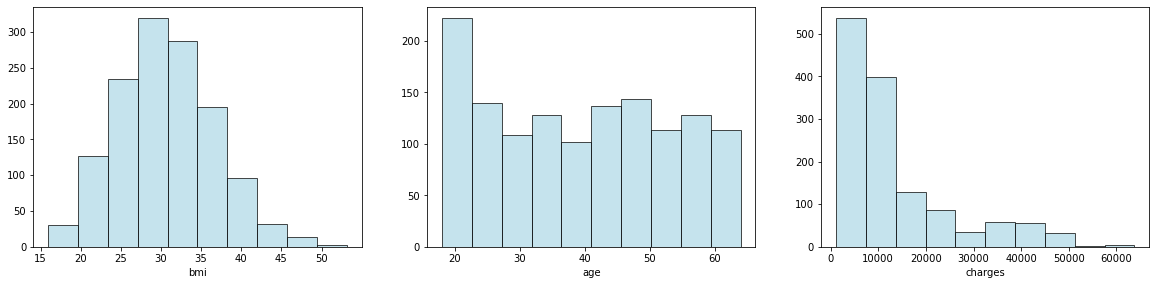

In [42]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df.bmi, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(df.age, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(df.charges, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('charges')

Text(0.5, 0, 'charges')

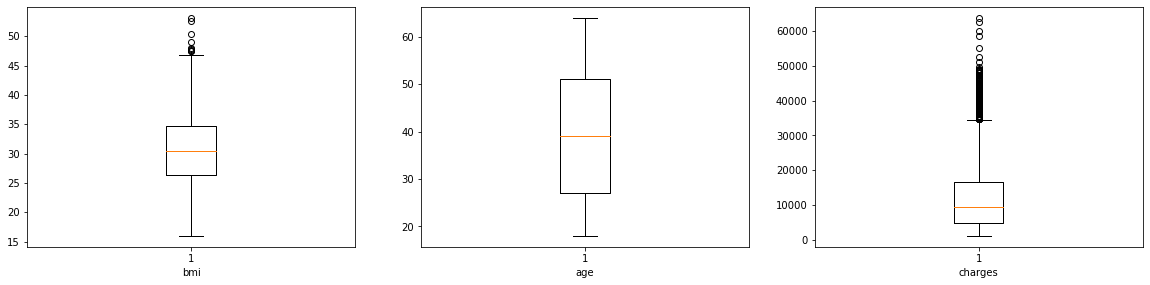

In [49]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.boxplot(df.bmi)
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.boxplot(df.age)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.boxplot(df.charges)
plt.xlabel('charges')

In [15]:

#6
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df.bmi),stats.skew(df.age),stats.skew(df.charges)]},
                        index=['bmi','age','charges'])  # Measure the skeweness of the required columns
Skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


<AxesSubplot:xlabel='sex', ylabel='smoker'>

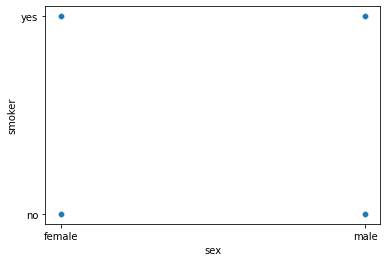

In [25]:
#8
sns.scatterplot(x="sex", y="smoker", data=df)

Text(0.5, 1.0, 'Gender distribution')

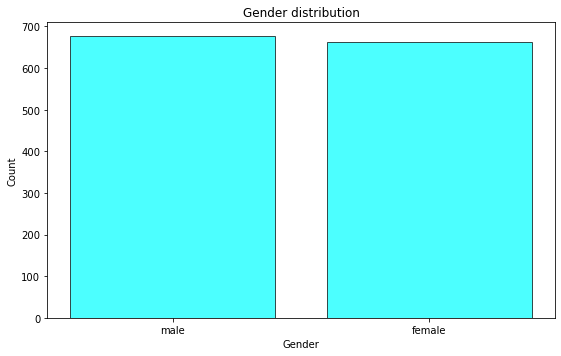

In [50]:
plt.figure(figsize=(20,25))

x1 = df.sex.value_counts().index    #Values for x-axis
y1 = [df['sex'].value_counts()[j] for j in x1]   # Count of each class on y-axis

plt.subplot(4,2,2)
plt.bar(x1,y1, align='center',color = 'aqua',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')

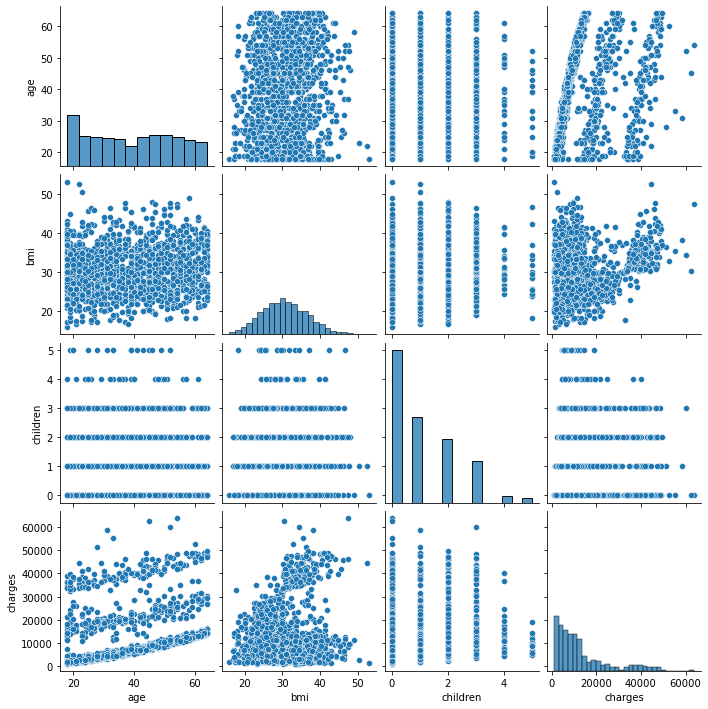

In [29]:
# 9
sns.pairplot(df)

# statistical evidence

In [53]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


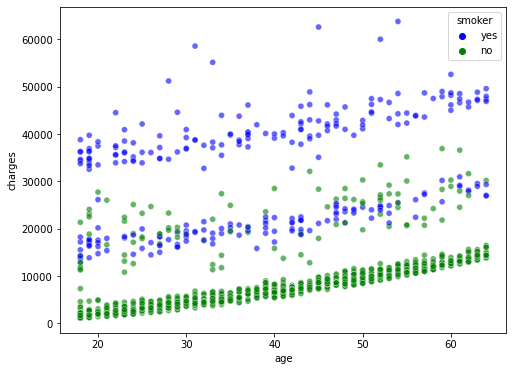

In [66]:
plt.figure(figsize=(8,6))
sns.scatterplot(df.age, df.charges,hue=df.smoker,palette= ['blue','green'] ,alpha=0.6)
plt.show()

In [65]:
Ho = "Charges of smoker and non-smoker are same"   
Ha = "Charges of smoker and non-smoker are not the same"   

x = np.array(df[df.smoker == 'yes'].charges)  
y = np.array(df[df.smoker == 'no'].charges) 
t, p_value  = stats.ttest_ind(x,y, axis = 0)  
if p_value < 0.05: 
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Charges of smoker and non-smoker are not the same as the p_value (8.271435842179102e-283) < 0.05


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi', ylabel='sex'>

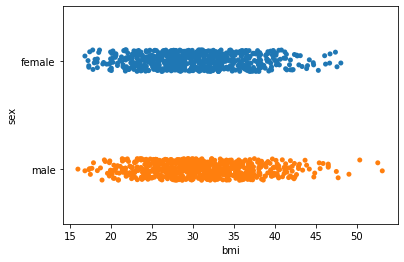

In [58]:
sns.stripplot(df['bmi'],df['sex'])

In [63]:
df.sex.value_counts()  

male      676
female    662
Name: sex, dtype: int64

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


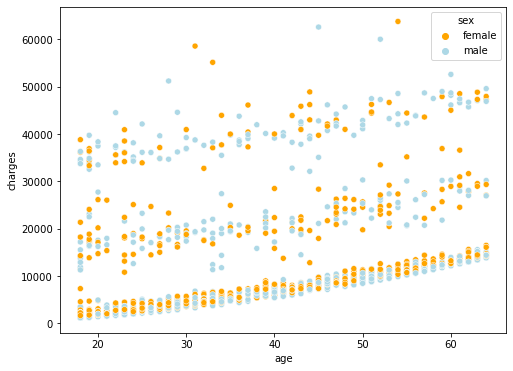

In [62]:
plt.figure(figsize=(8,6))
sns.scatterplot(df.age, df.charges,hue=df.sex,palette= ['orange','lightblue'] )
plt.show()

In [67]:
Ho = "Gender has no effect on bmi"   
Ha = "Gender has an effect on bmi"   
x = np.array(df[df.sex == 'male'].bmi) 
y = np.array(df[df.sex == 'female'].bmi) 
t, p_value  = stats.ttest_ind(x,y, axis = 0)  
if p_value < 0.05: 
    print(f'{Ha} as the p_value ({p_value.round()}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
   

Gender has no effect on bmi as the p_value (0.09) > 0.05


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges', ylabel='sex'>

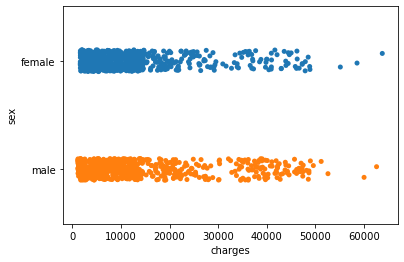

In [71]:
sns.stripplot(df['charges'],df['sex'])

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges', ylabel='sex'>

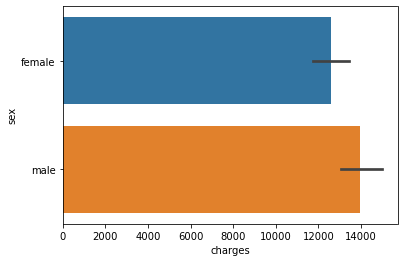

In [80]:
sns.barplot(df['charges'],df['sex'])

In [72]:
Ho = "Gender has no effect on charges"   
Ha = "Gender has an effect on charges"   
x = np.array(df[df.sex == 'male'].charges) 
y = np.array(df[df.sex == 'female'].charges) 
t, p_value  = stats.ttest_ind(x,y, axis = 0)  
if p_value < 0.05: 
    print(f'{Ha} as the p_value ({p_value.round()}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
   

Gender has an effect on charges as the p_value (0.0) < 0.05


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='sex'>

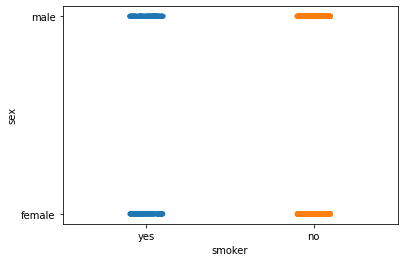

In [77]:
sns.stripplot(df['smoker'],df['sex'])

In [78]:
# Chi_square test to check if smoking habits are different for different genders
Ho = "Gender has no effect on smoking habits"   
Ha = "Gender has an effect on smoking habits"   

crosstab = pd.crosstab(df['sex'],df['smoker'])  

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05: 
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Gender has an effect on smoking habits as the p_value (0.007) < 0.05


smoker,no,yes
sex,,
female,547,115
male,517,159


Text(0.5, 1.0, 'Gender distribution')

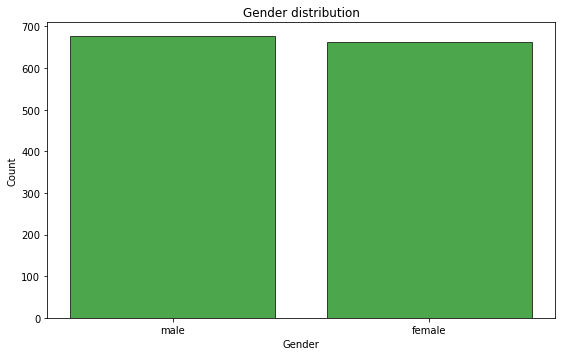

In [82]:
plt.figure(figsize=(20,25))

x1 = df.sex.value_counts().index    #Values for x-axis
y1 = [df['sex'].value_counts()[j] for j in x1]   # Count of each class on y-axis

plt.subplot(4,2,2)
plt.bar(x1,y1, align='center',color = 'green',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='region'>

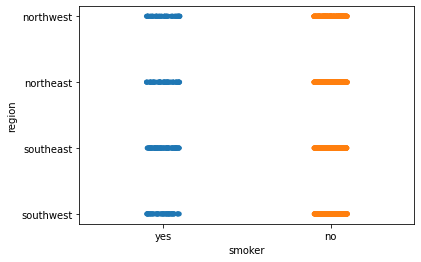

In [85]:
sns.stripplot(df['smoker'],df['region'])

In [84]:
Ho = "region has no effect on smoking habits"   
Ha = "region has an effect on smoking habits"   

crosstab = pd.crosstab(df['region'],df['smoker'])  

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05: 
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

region has no effect on smoking habits as the p_value (0.062) > 0.05


smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='region'>

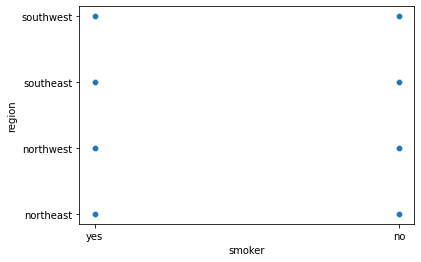

In [94]:
sns.scatterplot(df['smoker'],df['region'])

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='children', ylabel='bmi'>

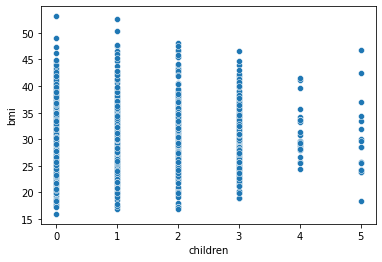

In [96]:
sns.scatterplot(df['children'],df['bmi'])

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='children', ylabel='bmi'>

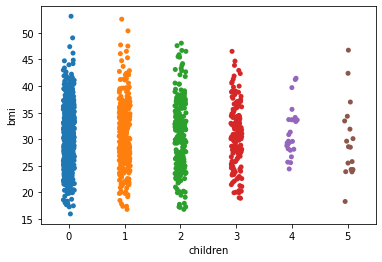

In [97]:
sns.stripplot(df['children'],df['bmi'])

In [99]:
import copy
Ho = "No. of children has no effect on bmi"   
Ha = "No. of children has an effect on bmi"  
female_df = copy.deepcopy(df[df['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']
f_stat, p_value = stats.f_oneway(zero,one,two)
if p_value < 0.05: 
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

No. of children has no effect on bmi as the p_value (0.716) > 0.05
